## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
data = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
data

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [4]:
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
heart['cp'] = heart['cp'].astype('category')
heart['sex'] = heart['sex'].astype('category')
heart['restecg'] = heart['restecg'].astype('category')
heart.head()


,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [5]:
X = heart[["age","chol"]]
y = heart["diagnosis"]

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=['category', 'object']))
    ],
    remainder="passthrough"
)

In [6]:
#Logistic Regression

log_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("logistic_regression", LogisticRegression())
    ]
)

log_pipeline_fitted = log_pipeline.fit(X,y)

log_intercept = log_pipeline_fitted.named_steps['logistic_regression'].intercept_[0]
log_age = log_pipeline_fitted.named_steps["logistic_regression"].coef_[0][0]
log_chol = log_pipeline_fitted.named_steps["logistic_regression"].coef_[0][1]
print(log_intercept)
print(log_age)
print(log_chol)

-3.2401122588588933
0.04686330613036339
0.001801238519029292


In [7]:
zi = np.log(.9/.1)
zi

2.1972245773362196

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [8]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("LDA", LinearDiscriminantAnalysis())
    ]
)

lda_pipeline_fitted = lda_pipeline.fit(X,y)

lda_intercept = lda_pipeline_fitted.named_steps["LDA"].intercept_[0]
lda_age = lda_pipeline_fitted.named_steps["LDA"].coef_[0][0]
lda_chol = lda_pipeline_fitted.named_steps["LDA"].coef_[0][1]
print(lda_intercept)
print(lda_age)
print(lda_chol)

-3.2196776604068784
0.04655743553694484
0.0017896671039291314


In [9]:
intercept = -3.21967
age_coeff = 0.04655743553694484
chol_coeff = 0.0017896671039291314
age = 55

cholesterol = (-intercept - (age_coeff * age)) / chol_coeff
print(cholesterol)

368.23107717698196


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [11]:
from sklearn.svm import SVC

svc_pipeline = Pipeline(
  [("preprocessing", ct),
  ("SVC", SVC(kernel = "linear"))]
)

svc_pipeline_fitted = svc_pipeline.fit(X,y)
svc_intercept = svc_pipeline_fitted.named_steps["SVC"].intercept_[0]
svc_age = svc_pipeline_fitted.named_steps["SVC"].coef_[0][0]
svc_chol = svc_pipeline_fitted.named_steps["SVC"].coef_[0][1]
print(svc_intercept)
print(svc_age)
print(svc_chol)

-4.686034055211244
0.06439772419707879
0.0036589616029232275


In [13]:
chol = ((-svc_age*55)-svc_intercept)/svc_chol
print(chol)

312.7005277830234


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

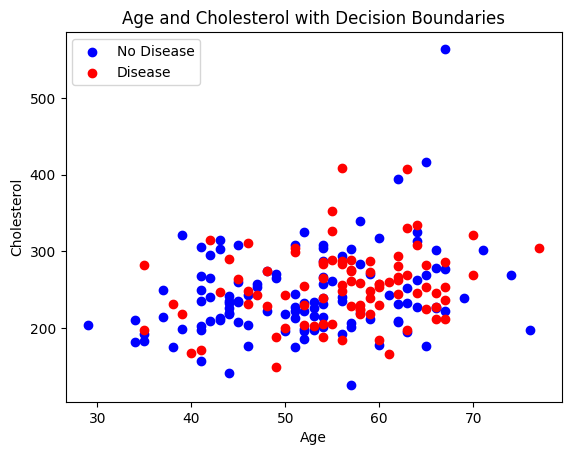

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
heart['diagnosis'] = label_encoder.fit_transform(heart['diagnosis'])

plt.scatter(heart[heart['diagnosis'] == 0]['age'], heart[heart['diagnosis'] == 0]['chol'], label='No Disease', color='blue')
plt.scatter(heart[heart['diagnosis'] == 1]['age'], heart[heart['diagnosis'] == 1]['chol'], label='Disease', color='red')


plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.title('Age and Cholesterol with Decision Boundaries')
plt.show()